## Object Oriented Programming
An object has two characteristics - attributes and behaviour

### Class
A class is a blue print for the object.
Instance is an object created from class

In [5]:
# syntax
class Vehicle:
    '''Docstring for the class'''
    pass
print(Vehicle.__doc__)

Docstring for the class


### Constructor
  
  __init__() is called whenever a new object is created for the class. It is normally used to initiate variables

### Object
An object is an instance/instantiation of a class. No memory or storage is allocated where object is defined.

### Methods
Methods are functions defined inside the body of the class. Used to define the behaviour of the objects.

In [15]:
class Vehicle:
    # class attribute
    species = "car"
    
    # instance attribute
    def __init__(self, name, brand):
        self.name = name
        self.brand = brand
    
    # class methods 
    def calculateSpeed(self, val = 100):
        return f"Speed is {val}"
    
    def printModel(self):
        return f"Vehicle brand is {self.brand}"
        
# initiate the class
v1 = Vehicle("Truck", "BMW")

# access class attributes
print(v1.species)
print(v1.__class__.species)

# access instance attributes
print(v1.name, v1.brand)

print(v1.calculateSpeed(200))
print(v1.printModel())

car
car
Truck BMW
Speed is 200
Vehicle brand is BMW


### Inheritance
Creating new class using details of existing class. Newly created class is child/derived class and the main class is base/parent class

In [8]:
# Parent Class
class Bird:
    
    def __init__(self):
        print("Bird is ready")
    
    def whoIsThis(self):
        print("Bird")
    
    def swim(self):
        print("Swim faster - Bird")
        
# Child Class
class Penguin(Bird):
    def __init__(self):
        # call super() function
        super().__init__()   # super is preferred over calling by class name
        #Bird.__init__(self)    # same as above super keyword
        print("Penguine is ready")
    
    def whoIsThis(self):
        print("Penguine")
    
    def run(self):
        print("Run Faster")
        
    #def swim(self):
    #    super().swim()
    #    print("Swim faster - Penguine")
              
p = Penguin()
p.whoIsThis()
p.swim()
p.run()

Bird is ready
Bird is ready
Penguine is ready
Penguine
Swim faster - Bird
Run Faster


In [12]:
print(isinstance(p, Penguin))
print(isinstance(p, Bird))
print(issubclass(Penguin, Bird))
print(issubclass(Bird, Penguin))

True
True
True
False


####  Multiple inheritance

In [26]:

class Base1:
    def __init__(self,a=0):
        self.a = a
        print("Base1 init")
    def test(self):
        print("Hello Base1")
        
class Base2:
    def __init__(self,b=1):
        self.b = b
        print("Base2 init")
        
    def test(self):
        print("Hello Base2")
            
class MultiDerived(Base1, Base2):
    def __init__(self,c=2):
        super().__init__()
        print("MultiDerived init")
        
    def test(self):
        print("Hello MultiDerived")

        
m = MultiDerived()
m.test()

Base1 init
MultiDerived init
Hello MultiDerived


In [27]:
MultiDerived.__mro__  # MultiDerviced.mro()

(__main__.MultiDerived, __main__.Base1, __main__.Base2, object)

Here the methods will be searched according to Method Resolution Order (MRO). First object method will be searched in MultiDerived -> Base1 -> Base2 i.e. From left to right.
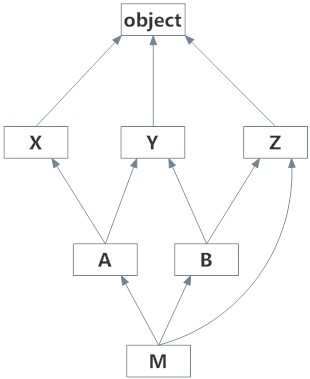


In [28]:
# Demonstration of MRO

class X:
    pass


class Y:
    pass


class Z:
    pass


class A(X, Y):
    pass


class B(Y, Z):
    pass


class M(B, A, Z):
    pass

# Output:
# [<class '__main__.M'>, <class '__main__.B'>,
#  <class '__main__.A'>, <class '__main__.X'>,
#  <class '__main__.Y'>, <class '__main__.Z'>,
#  <class 'object'>]

print(M.mro())

[<class '__main__.M'>, <class '__main__.B'>, <class '__main__.A'>, <class '__main__.X'>, <class '__main__.Y'>, <class '__main__.Z'>, <class 'object'>]


#### Multilevel Inheritance
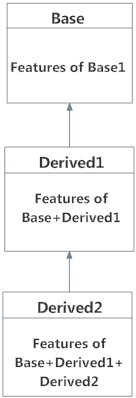

In [42]:
class Base1:
    def __init__(self):
        print("Base1 init")
        
        def test(self):
            print("Base1")
        
class Middle(Base1):
    def __init__(self):
        print("Middle init")
    #def test(self):
    #    print("Middle")
        
class Last(Middle):
    def __init__(self):
        super().__init__()
        print("Last init")

o = Last()
Last.__mro__

Middle init
Last init


(__main__.Last, __main__.Middle, __main__.Base1, object)

### Encapsulation
we can restrict the access to the methods and variables using _ or __

In [32]:
class Computer:
    
    def __init__(self):
        self.__maxPrice = 900
        self.demo = 30
        
    def sell(self):
        print(f"Selling price {self.__maxPrice}")
        
    def setMaxPrice(self, price):
        self.__maxPrice = price
        
c = Computer()
c.sell()
c.__maxPrice = 100
c.sell()
print(c.demo)
c.demo = 80
print(c.demo)

#using setter function
c.setMaxPrice(100)
c.sell()

Selling price 900
Selling price 900
30
80
Selling price 100


### Polymorphism
It means occuring in different forms or having many forms

In [34]:
# same + operator is used to add integers and concatenate strings
print(3 + 2)
print("Hello"+ " " + "World")

# len() function can be used to calculate length for different datatypes/ sequences
print(len([1, 2, 3, 4, 5]))
print(len("Hello"))
print(len({"name": "Krushna", "age": 25}))

5
Hello World
5
5
2


In [3]:
class Parrot:

    def fly(self):
        print("Parrot can fly")
    
    def swim(self):
        print("Parrot can't swim")

class Penguin:

    def fly(self):
        print("Penguin can't fly")
    
    def swim(self):
        print("Penguin can swim")

# common interface
def flying_test(bird):
    bird.fly()

#instantiate objects
blu = Parrot()
peggy = Penguin()

# passing the object
flying_test(blu)
flying_test(peggy)

Parrot can fly
Penguin can't fly
Parrot can fly
Penguin can't fly


Here the common interface flying_test is responsible for performing polymorphism

### Operator Overloading
Like + operator

In [18]:
class Point:
    def __init__(self,x,y):
        self.x = x
        self.y = y
    
p = Point(1,2)
p2 = Point(1, 2)
print(p)
print(p+p2)

TypeError: unsupported operand type(s) for +: 'Point' and 'Point'

In [19]:
class Point:
    def __init__(self,x,y):
        self.x = x
        self.y = y
        
    def __str__(self):
        return f"coordinates - {self.x}, {self.y}"
    
    def __add__(self,other):
        x = self.x + other.x
        y = self.y + other.y
        return (x,y)

p = Point(1,2)
p2 = Point(1,2)
# internally it calls p.__str__()
print(p)   
print(str(p))
print(format(p)) 
print(p.__str__())

# addition overloading
print(p + p2) # p.__add__(p2) -> Point.__add__(p,p2)

coordinates - 1, 2
coordinates - 1, 2
coordinates - 1, 2
coordinates - 1, 2
(2, 4)


## Iterators

Iterators are objects that can be iterated upon. Python iterator objects are implemented using __iter__ and __next__

In [5]:
my_list = [1, 2, 3, 4, 5]  # called as iterable

#getting iterator object
my_iter = iter(my_list)

print(next(my_iter))
print(next(my_iter))
print(my_iter.__next__())

1
2
3


In [6]:
#the best way to work with iterator is for loop
for i in my_list:
    print(i)

1
2
3
4
5


In [11]:
class PowTwo:
    """Class to implement an iterator
    of powers of two"""

    def __init__(self, max=0):
        self.max = max

    def __iter__(self):
        self.n = 0
        return self

    def __next__(self):
        if self.n <= self.max:
            result = 2 ** self.n
            self.n += 1
            return result
        else:
            raise StopIteration


# create an object
numbers = PowTwo(3)

# create an iterable from the object
i = iter(numbers)

# Using next to get to the next iterator element
print(next(i))
print(next(i))
print(next(i))
print(next(i))
print(next(i))

1
2
4
8


StopIteration: 

In [12]:
# calling out iterator
for i in PowTwo(5):
    print(i)

1
2
4
8
16
32


## Generators
In interator, We have to implement a class with __iter__() and __next__() method, keep track of internal states, and raise StopIteration when there are no values to be returned.Python generators are a simple way of creating iterators.

If a function contains at least one yield statement (it may contain other yield or return statements), it becomes a generator function.. Both yield and return will return some value from a function. The difference is that while a return statement terminates a function entirely, yield statement pauses the function saving all its states and later continues from there on successive calls.

Difference between generator function and iterator  -
- Generator function contains one or more yield statements.
- Once the function yields, the function is paused and the control is transferred to the caller.


In [13]:
#generator that reverses a string
def rev_str(my_str):
    length = len(my_str)
    for i in range(length - 1, -1, -1):
        yield my_str[i]


# For loop to reverse the string
for char in rev_str("hello"):
    print(char)

o
l
l
e
h


In [17]:
def PowTwoGen(max=0):
    n = 0
    while n < max:
        yield 2 ** n
        n += 1
for i in PowTwoGen(4):
    print(i)

1
2
4
8


## Closure

The technique by which some data ("Hello" in this case) gets attached to the code is called closure in Python.


In [ ]:
def print_msg(msg):
    # This is the outer enclosing function

    def printer():
        # This is the nested function
        print(msg)

    return printer  # returns the nested function


# Now let's try calling this function.
# Output: Hello
another = print_msg("Hello")
another()

## Decorators
Functions and methods are called as callable. in fact any object which implements __call__() method is termed as callable.
Decorator is a function which takes another fucntion as argument and returns the function. Using decorators we can change the logic in wrapper function without making any changes to main function.

In [3]:
def make_pretty(func):
    def inner():
        print("I got decorated 1")
        func()
    return inner


def ordinary():
    print("I am ordinary 1")
    
ordinary = make_pretty(ordinary)
ordinary()

I got decorated
I am ordinary


In [5]:
def make_pretty(func):
    def inner():
        print("I got decorated 2")
        func()
    return inner

@make_pretty
def ordinary():
    print("I am ordinary 2")
    
ordinary()           #equivalent to ordinary = make_pretty(ordinary)

I got decorated 2
I am ordinary 2


In [10]:
def smart_divide(func):
    def inner(a, b):
        print("I am going to divide", a, "and", b)
        if b == 0:
            print("Whoops! cannot divide")
            return

        return func(a, b)
    return inner


@smart_divide
def divide(a, b):
    print(a/b)
divide(10,0)

I am going to divide 10 and 0
Whoops! cannot divide


In [35]:
def works_for_all(func):
    def inner(*args, **kwargs):
        print("I can decorate any function")
        return func(*args, **kwargs)
    return inner

@works_for_all
def divide(a, b):
    print(a/b)

# divide(1,2)
@works_for_all
def hello(a, b, c):
    print(a,b,c)

# print(hello.__name__)

hello(1,2,3)

I can decorate any function
1 2 3
